This notebook visualizes the answer for a nice riddle by @talitshe:

<div dir="rtl">

[חידה מתמטית חביבה: נניח שהתפלגות בנים/בנות בלידה היא 50/50. במדינה בה כל זוג (ללא יוצא מהכלל) מביא ילדים עד שנולד להם בן, ואז מפסיק (כלומר, לעולם אין שני בנים לזוג, אבל למשל 7 בנות ואז בן זה אפשרי), בכמה גדול מספר הבנות ממספר הבנים?](https://twitter.com/talitshe/status/1578692070343987200)

</div>

The probabily of having a girl is $\frac{1}{2}$, but you may tweak it using the slider (or edit the code directly).

You must press **Ctrl+F9** afterwards to recalculate all cells (and regenerate the diagram). Ignore any warning Google gives you about unsafe code.

In [1]:
# @title Probability of having a girl
prob = 0.5  # @param {type:"slider", min:0.1, max:0.9, step:0.1}

In [2]:
scale = 100

We calculate the girls born in each birth using the formula $prob^n$. Theoretically, there are inifitine births (as a woman can birth only girls), so practically we clamp the results at $1.0$ girl.

In [3]:
# Alas, Google's python doesn't support expression assignment.
girls = [ scale * prob**n for n in range(100) if scale * prob**n > 1.0 ]
girls

[100.0, 50.0, 25.0, 12.5, 6.25, 3.125, 1.5625]

To calculate the boys in each birth, we calculate the girls of the previous birth, and take the $(1-prob)$ portion.

In [4]:
boys  = [ scale * prob**(n - 1) * (1 - prob) for n in range(len(girls)) ]

Now let's plot the data:

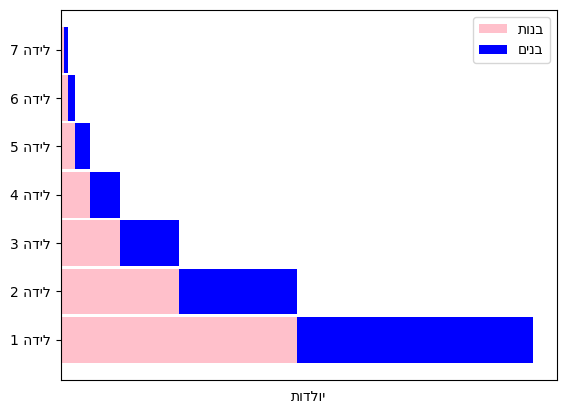

In [5]:
from matplotlib.pyplot import *

labels = [ str(n + 1) + ' הדיל' for n in range(len(girls)) ]
bar_height = 0.95

barh(labels, girls, bar_height, label='תונב', color='pink')
barh(labels, boys, bar_height, label='םינב', color='blue', left=girls)
xlabel('תודלוי')
xticks([])
legend()
show()